In [98]:
import matplotlib.pyplot as plt
import numpy as np
import imutils
import cv2
from os.path import join

#function to add contrast to the image, returns image with better contrast
def add_contrast(image):
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    cl = clahe.apply(l)
    limg = cv2.merge((cl, a,b))
    return cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

imgname = 'test5.jpg'

def read_image(image):
    img = cv2.imread(image)
    RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return RGB_img

def display_image(image):
    plt.imshow(image)
    plt.show()

def resize_image(image, size=(800,800)):
    return cv2.resize(image, size)

def blur_image(image):
    return cv2.GaussianBlur(image, (11, 11), 0)

def combine(image, contrast=True, resize=True, blur=False):
    if contrast:
        img = add_contrast(image)
    if resize:
        img = resize_image(img)
    if blur:
        img = blur_image(img)

    return img

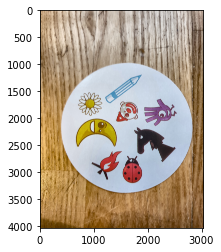

In [99]:
fotka = read_image(imgname)
fotka1 = add_contrast(fotka)
display_image(fotka1)

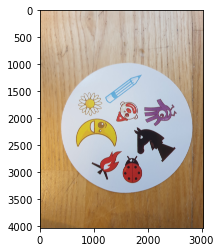

In [100]:
fotka_blur = blur_image(fotka)
display_image(fotka_blur)

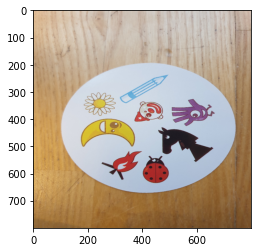

In [101]:
fotka_resize = resize_image(fotka)
display_image(fotka_resize)

In [102]:
def gray_image(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

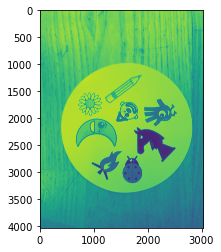

In [103]:
fotka_gray = gray_image(fotka)
display_image(fotka_gray)

In [86]:
def convert_color(image, toRGB=True):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

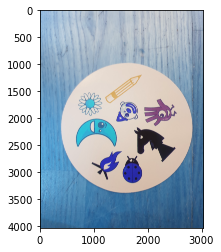

In [104]:
fotka_converted = convert_color(fotka)
display_image(fotka_converted)

In [105]:
def thresh_image(image, threshold=185):
    return cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)[1]

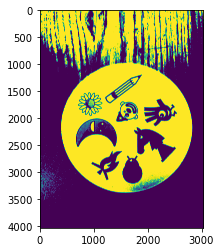

In [106]:
fotka_threshed = thresh_image(fotka_gray)
display_image(fotka_threshed)

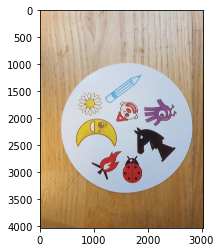

In [107]:
display_image(fotka)

In [30]:
def save_image(directory, image, name):
    path = join(directory, '{0}'.format(name)+'.jpg')
    cv2.imwrite(path, image)

In [42]:
def grab_contours(image, threshold=190, all=False):
    
    image_grayed = gray_image(image)
    image_threshed = thresh_image(image_grayed, threshold=threshold)
    
    if all:
        contours = cv2.findContours(image_threshed.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    else: 
        contours = cv2.findContours(image_threshed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    contours = imutils.grab_contours(contours)
    
    return contours

In [125]:
def sort_countours_by_area(contours, area=False):
    if area:
        contours = [c for c in contours if cv2.contourArea(c) > area]

    return sorted(contours, key=cv2.contourArea, reverse=True)

In [140]:
def draw_contour(image, contour):
    contour_image = cv2.drawContours(image, [contour], -1, (255,0,0), 3)
    
    return contour_image

In [127]:
knt = grab_contours(fotka, threshold=190, all=True)

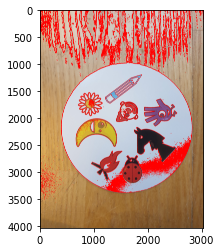

In [128]:
test = draw_contour(fotka, knt)
display_image(test)

In [97]:
def add_images(image1, image2, hor=True):
    if hor:
        img = np.concatenate((image1, image2), axis=1)
    else:
        img = np.concatenate((image1, image2), axis=0)
    return img

In [129]:
knt_sorted = sort_countours_by_area(knt, area=1000)

In [139]:
kolo = knt_sorted[0]
cv2.contourArea(kolo)

3681678.0

2071

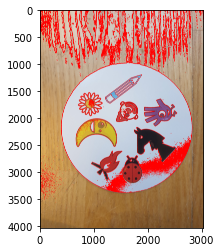

In [141]:
drukuj_kolo = draw_contour(fotka, kolo)
display_image(drukuj_kolo)

In [146]:

import os
from os import listdir, makedirs
from os.path import isfile, isdir, join

In [147]:
def create_prediction_folders(number):
    folder = 'test/predict{0}'.format(number)
    if not isdir(folder):
        makedirs(folder)
        makedirs('{0}/predict'.format(folder))
    return folder